<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science  - Regresión Lineal</h1>

# <font color='red' style='font-size: 30px;'>Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Bibliotecas opcionales

https://docs.python.org/3/library/warnings.html

In [2]:
import warnings

warnings.filterwarnings('ignore') #warnings.filterwarnings(action='once')
#esta biblioteca nos permite apagar las notificaciones del notbook usamos el piremrcodigo apra eso
#loq esta en verde al lado del cogido es lo mas reconmendable con esa linea de codigo nos apracera solo uan ves la alestar o notificacion asi  no ignoamos notificaciones importantes

## El Dataset y el Proyecto
<hr>

### Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>La cerveza es una de las bebidas más democráticas y consumidas del mundo. No sin razón, es perfecta para casi todas las situaciones, desde el happy hour hasta las grandes fiestas de bodas.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El objetivo de este proyecto es estimar un modelo de <b>Machine Learning</b> utilizando la técnica de <b>Regresión Lineal</b> para demostrar los impactos de las variables disponibles en este dataset sobre el consumo de cerveza (Y). Al final del proyecto, tendremos un modelo de predicción para el consumo medio de cerveza según los inputs de un conjunto de variables (X's).</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años (en media).</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>fecha</b> - Fecha</li>
    <li><b>temp_media</b> - Temperatura Media (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>lluvia</b> - Precipitación (mm)</li>
    <li><b>fds</b> - Fin de Semana (1 = Sí; 0 = No)</li>
    <li><b>consumo</b> - Consumo de Cerveza (litros)</li>
</ul>

## Lectura de los datos

In [3]:
datos= pd.read_csv('Consumo_cerveza.csv',sep=';')

## Ver los datos

In [4]:
datos

,fecha,temp_media,temp_min,temp_max,lluvia,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando el tamaño del dataset

In [5]:
datos.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Analisis preliminar</font>

<hr style='border: 2px solid red;'>

## Estadísticos descriptivos

In [6]:

#redondemos a dos decimales.
datos.describe().round(2)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [7]:
#estees el primer paso antes de contruir elmodelo de regresion lineal.
#mientras mientras ma cerca de cero esta el coefiente mas debil la correlacion y mientras ams cerca de 1 o -1 mas ferte lacorrelacion
#dónde - 1 indica asociación negativa perfecta, cunado varaibel sube la otra baja
# donde +1 indica asociación positiva perfecta. cuando varaibel sube la otra tambien sube
#para calacualr al coreelacion usamos el metodo corr.
datos.corr().round(4)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
lluvia,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


In [8]:
#no usaremos la varriables de temperatu media y minima, esast dos variables tiene una correlacaion fuerte entre si y con las otras varaibles. tener mas de na variable fuerte no es buneo para elmodelo nos pueden problemas de estimacion en nuestro modelo

# <font color='red' style='font-size: 30px;'>Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

# Análisis gráfico

## Dibujando el plot de la variable *dependiente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

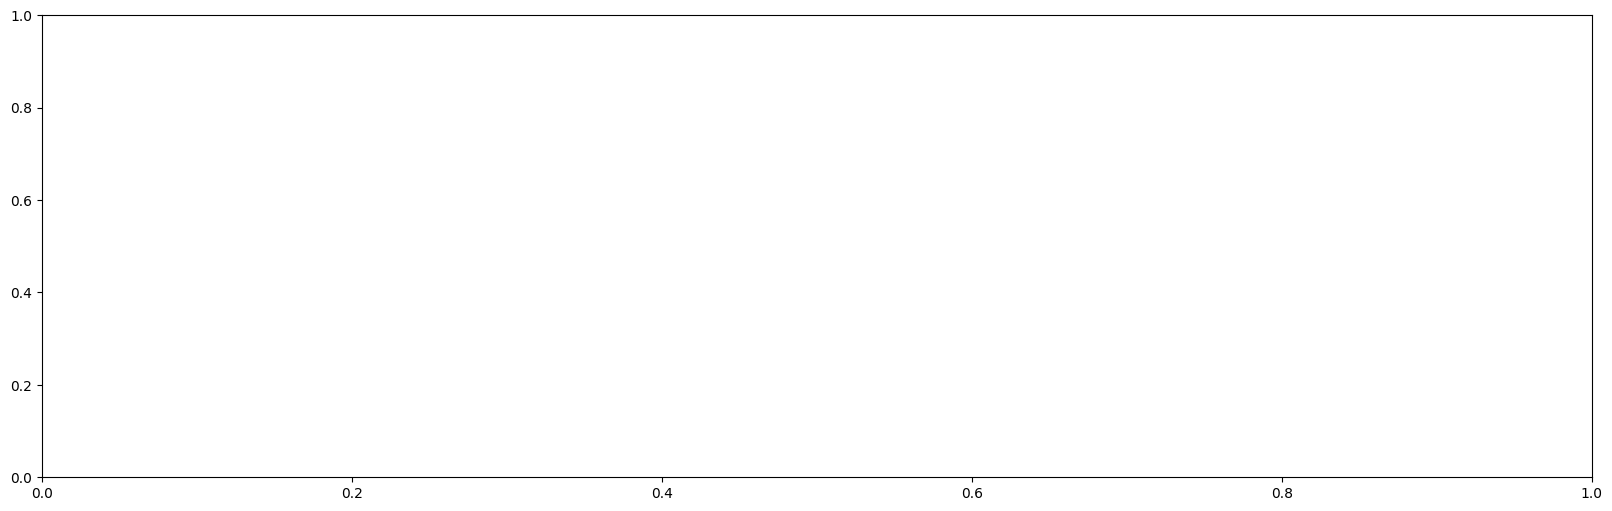

In [9]:
#creamos la figura par ael grafico, la guardamos en ax.
#hemos asignado la figura vasicai al objeto fig
#proximo paso asignamos el tipo de grafcio en ax
fig, ax=plt.subplots(figsize=(20,6))


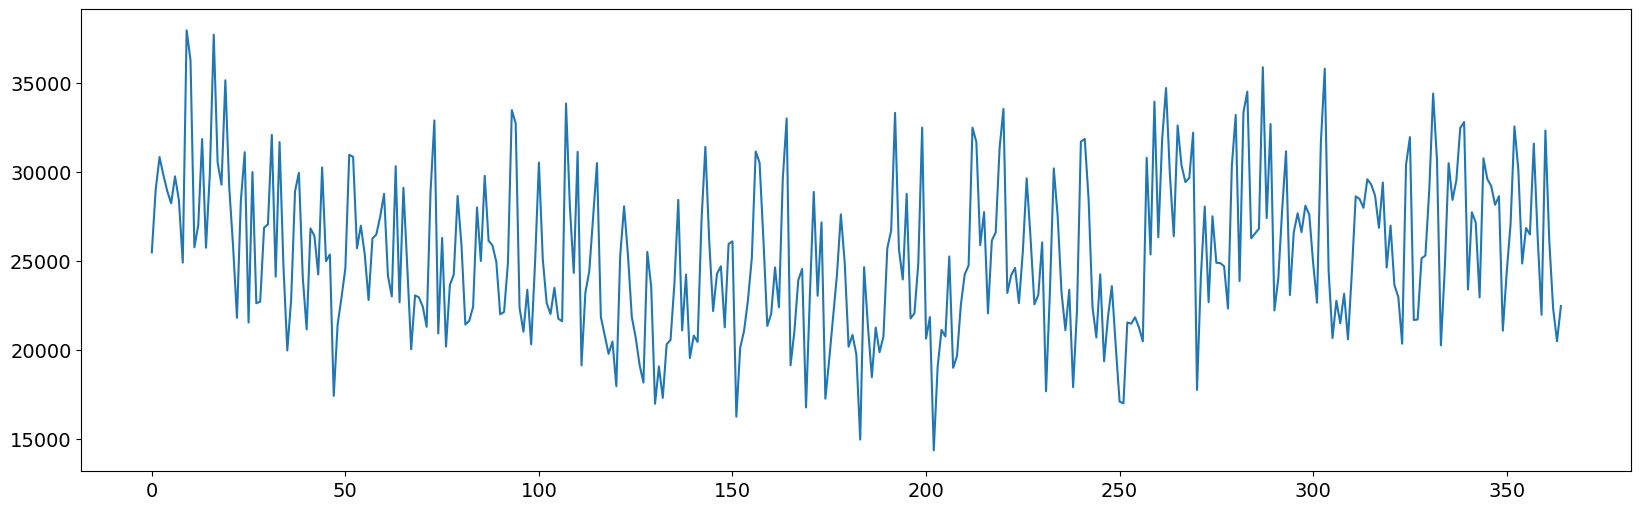

In [10]:
fig, ax=plt.subplots(figsize=(20,6))
#guardamos en ax los valores de la varible consumo del data frame datos, y samos el metodo plot par aun graifico de lineas.
ax=datos['consumo'].plot(fontsize=14)
#vemos la varaible consumo a lo largo del timepo.

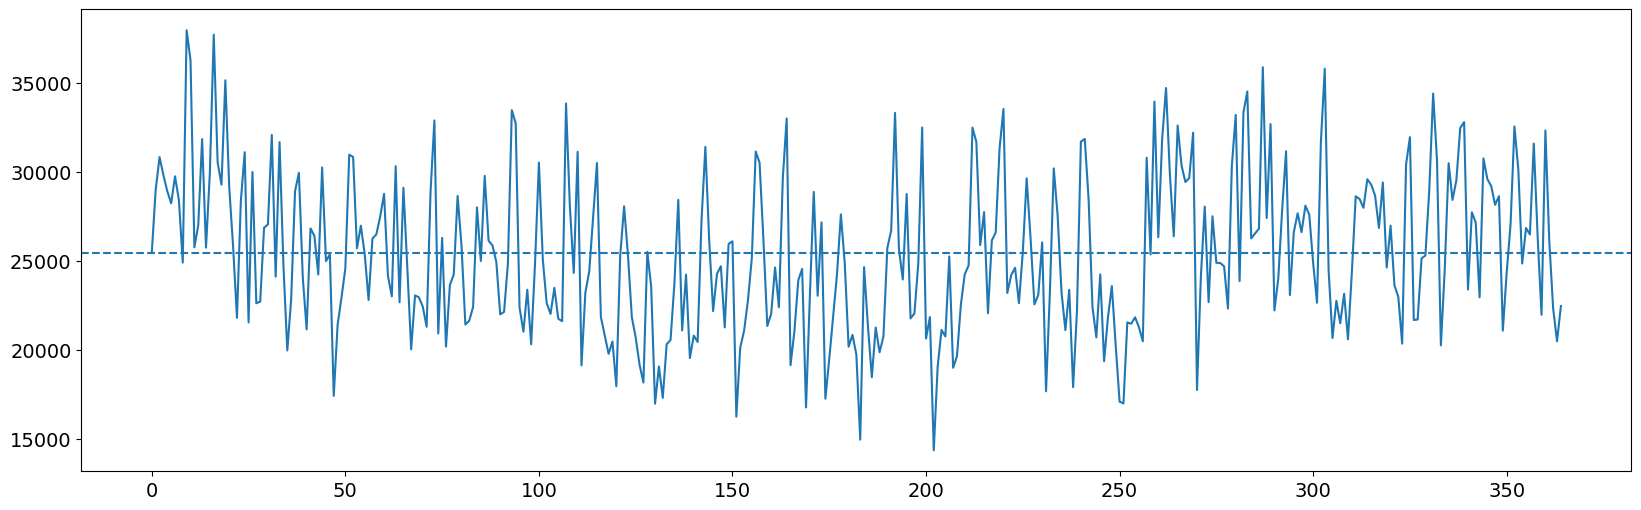

In [11]:
fig, ax=plt.subplots(figsize=(20,6))

ax=datos['consumo'].plot(fontsize=14)
#añadiremos una linea para representar graficamnete el consumo medio. usamos el metodo hline para crear la linea. y el emtodo mean de la blibliteca nympy(np), dentro de parentesis los valores o la dta de doden stiene q tomar llos varlores
#y por tultimo el estulo de lena qu quremos.
ax.axhline(y=np.mean(datos['consumo']),ls='--')


Text(0.5, 0, 'Días')

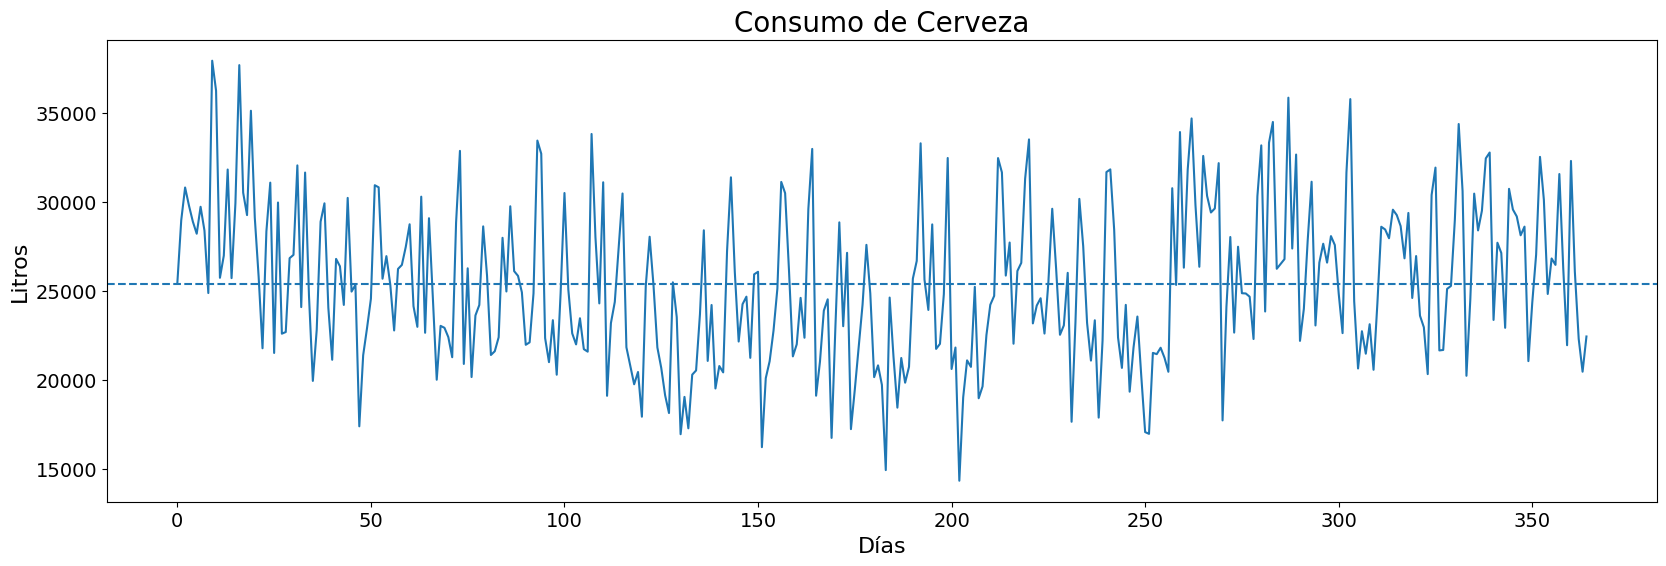

In [12]:
fig, ax=plt.subplots(figsize=(20,6))

ax=datos['consumo'].plot(fontsize=14)
ax.axhline(y=np.mean(datos['consumo']),ls='--')
#agemos al grafico: ttitulo para el grafico
#aremos titulo o nombre de lo q representa los eje x y y.
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Días', fontsize=16)

# <font color='red' style='font-size: 30px;'>Box Plot (Diagrama de caja)</font>



<hr style='border: 2px solid red;'>

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [13]:
import seaborn as sns

## Box plot de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

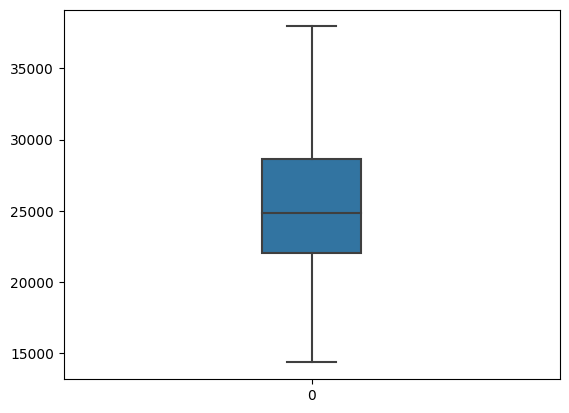

In [14]:
#creamos un graficoboxplot para comsumo y cambimoas su orientacion con el parametro orient y el largo.
ax=sns.boxplot(data=datos['consumo'],orient='v',width=0.2)
#no tenemos puntos fuera de los limtes. no hyaddatos outliers

<Axes: title={'center': 'Consumo de Cerveza'}, ylabel='Litros'>

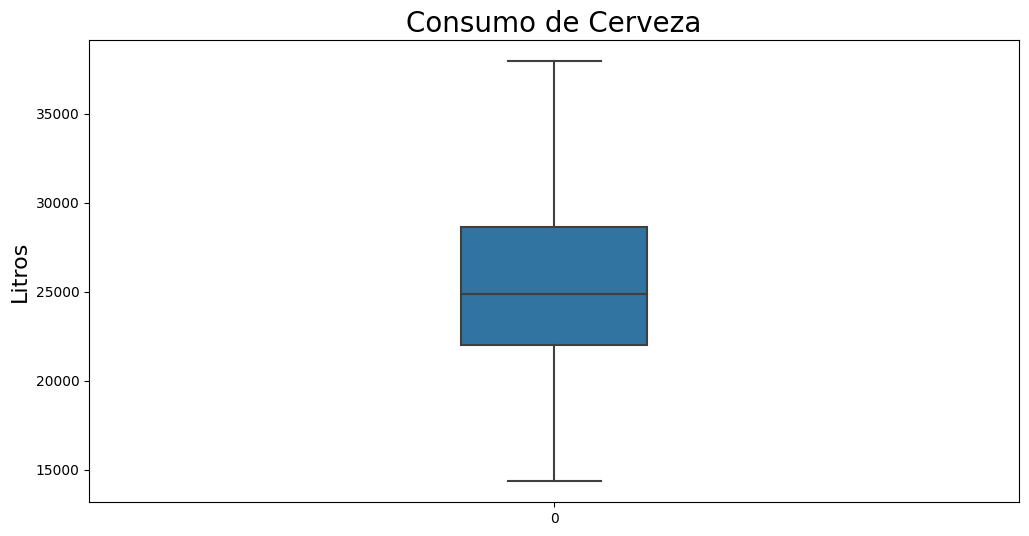

In [15]:
#mejoramos el grafico creando titulos a los eje y al graficos con los nomnbnre de las variable q representan
ax=sns.boxplot(data=datos['consumo'],orient='v',width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Box Plot con Dos Variables</font>
<hr style='border: 2px solid red;'>

## Analizar la variable *dependiente* (y) de acuerdo con una característica dada

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Fin de Semana', ylabel='Litros'>

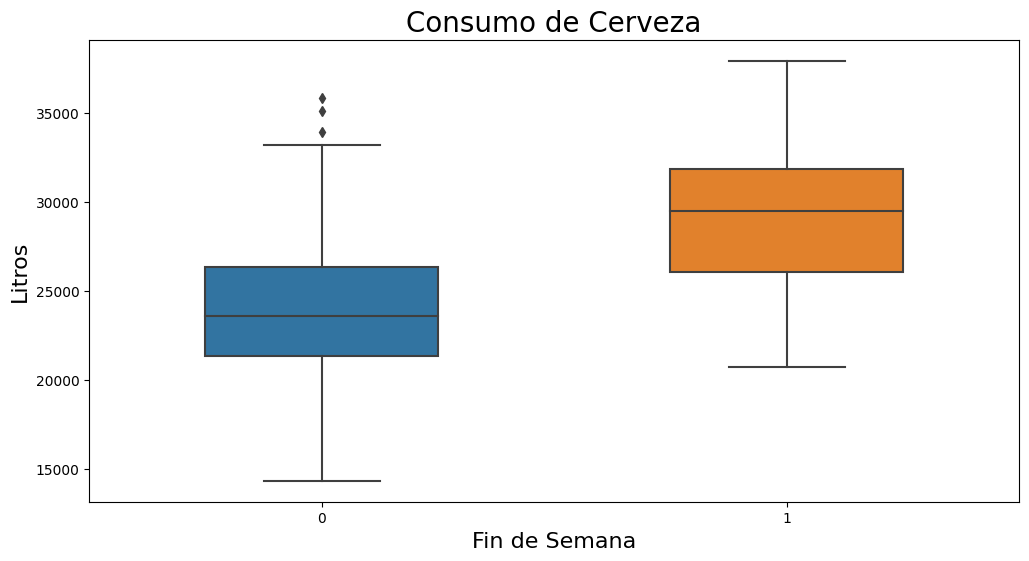

In [16]:
#la varaibe dependiete (y)es en proyecto lavariable consumo.
##agremos un neuvo parametro al grafcio anterior. ahora nuesto codigo del grafico tiene el parametro del eje y y el parametro del eje x
#el tercer parametro le decimos q la data el del datafram dato.
#la nueva varible es fds(finde semana) el conusmo del fin de seemana
ax=sns.boxplot(y='consumo',x='fds',data=datos,orient='v',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Fin de Semana', fontsize=16)
ax
#podemos notar que los fines de semana el consumo medio aumenta.
#los uotliers del prierm grafico puede ser dias festivos entre semana

## Configuración de color y estilo de la biblioteca *seaborn*

### Control de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de colores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [17]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
#ara cambiar ekl color del boxplot usamos el codigo de arriba.
# style -> white, dark, whitegrid, darkgrid, ticks
#para cambiar el estulo
sns.set_style('darkgrid')
#con estos codigo cambimos la paleta de colores y stilo predetermina de seaborn

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Fin de Semana', ylabel='Litros'>

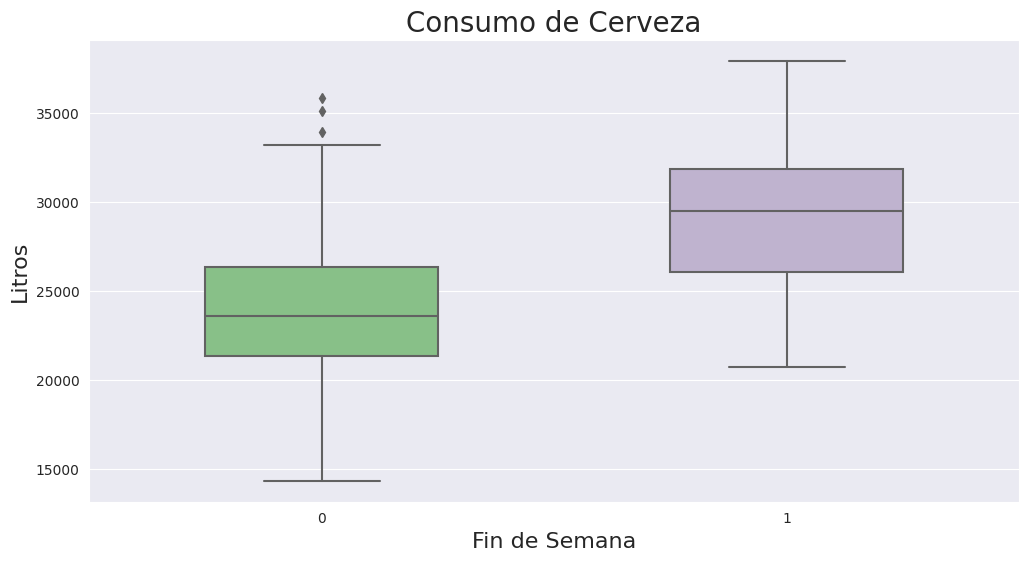

In [18]:
ax=sns.boxplot(y='consumo',x='fds',data=datos,orient='v',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Fin de Semana', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Distribución de frecuencias (Histograma)</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)


https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='consumo', ylabel='Consumo de Cerveza(Litros)'>

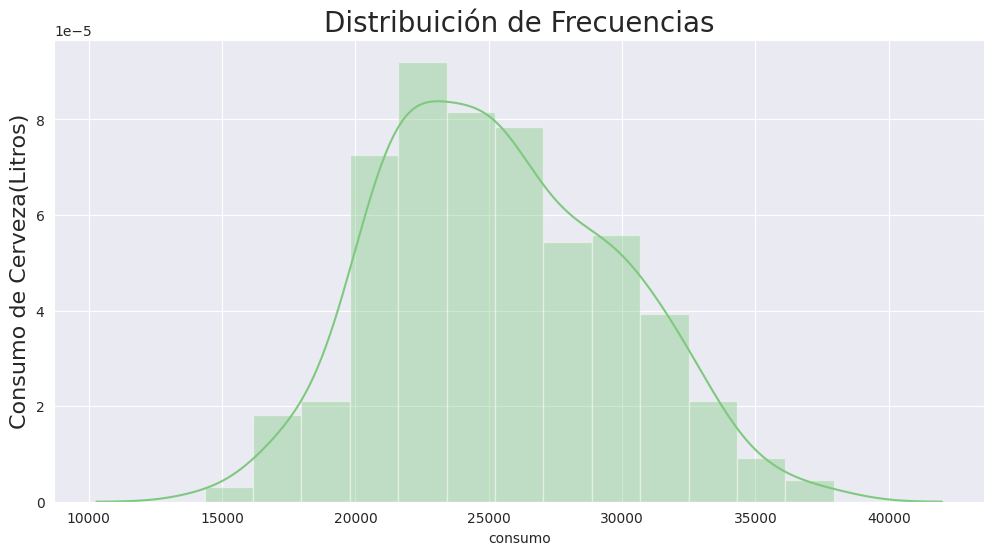

In [19]:
#para construir un histograma usamos la funcion displot
#amacenmoa sn el variable ax el graficos de consumo
#creamos una figura para el grafico
#colcaomos titulo apra el graficos y para el eje y
ax=sns.distplot(datos['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuición de Frecuencias',fontsize=20)
ax.set_ylabel('Consumo de Cerveza(Litros)', fontsize=16)
ax
#en el grafico podemos observar tenemos un pequeñaasimetria en el lado dercho,cmo en nuestro modelo quremos ahcer una regresion par apredecir la varaible sonusumo no hay porbela con la asimetria
#peor si tuvieramos que ahcer test estadisticos que depdenden la hipotesis de normalidad entonces tendriamos q ahcer traformaciones en los datos o aumntar los numeros de la varaible.

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión (scatterplots) entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

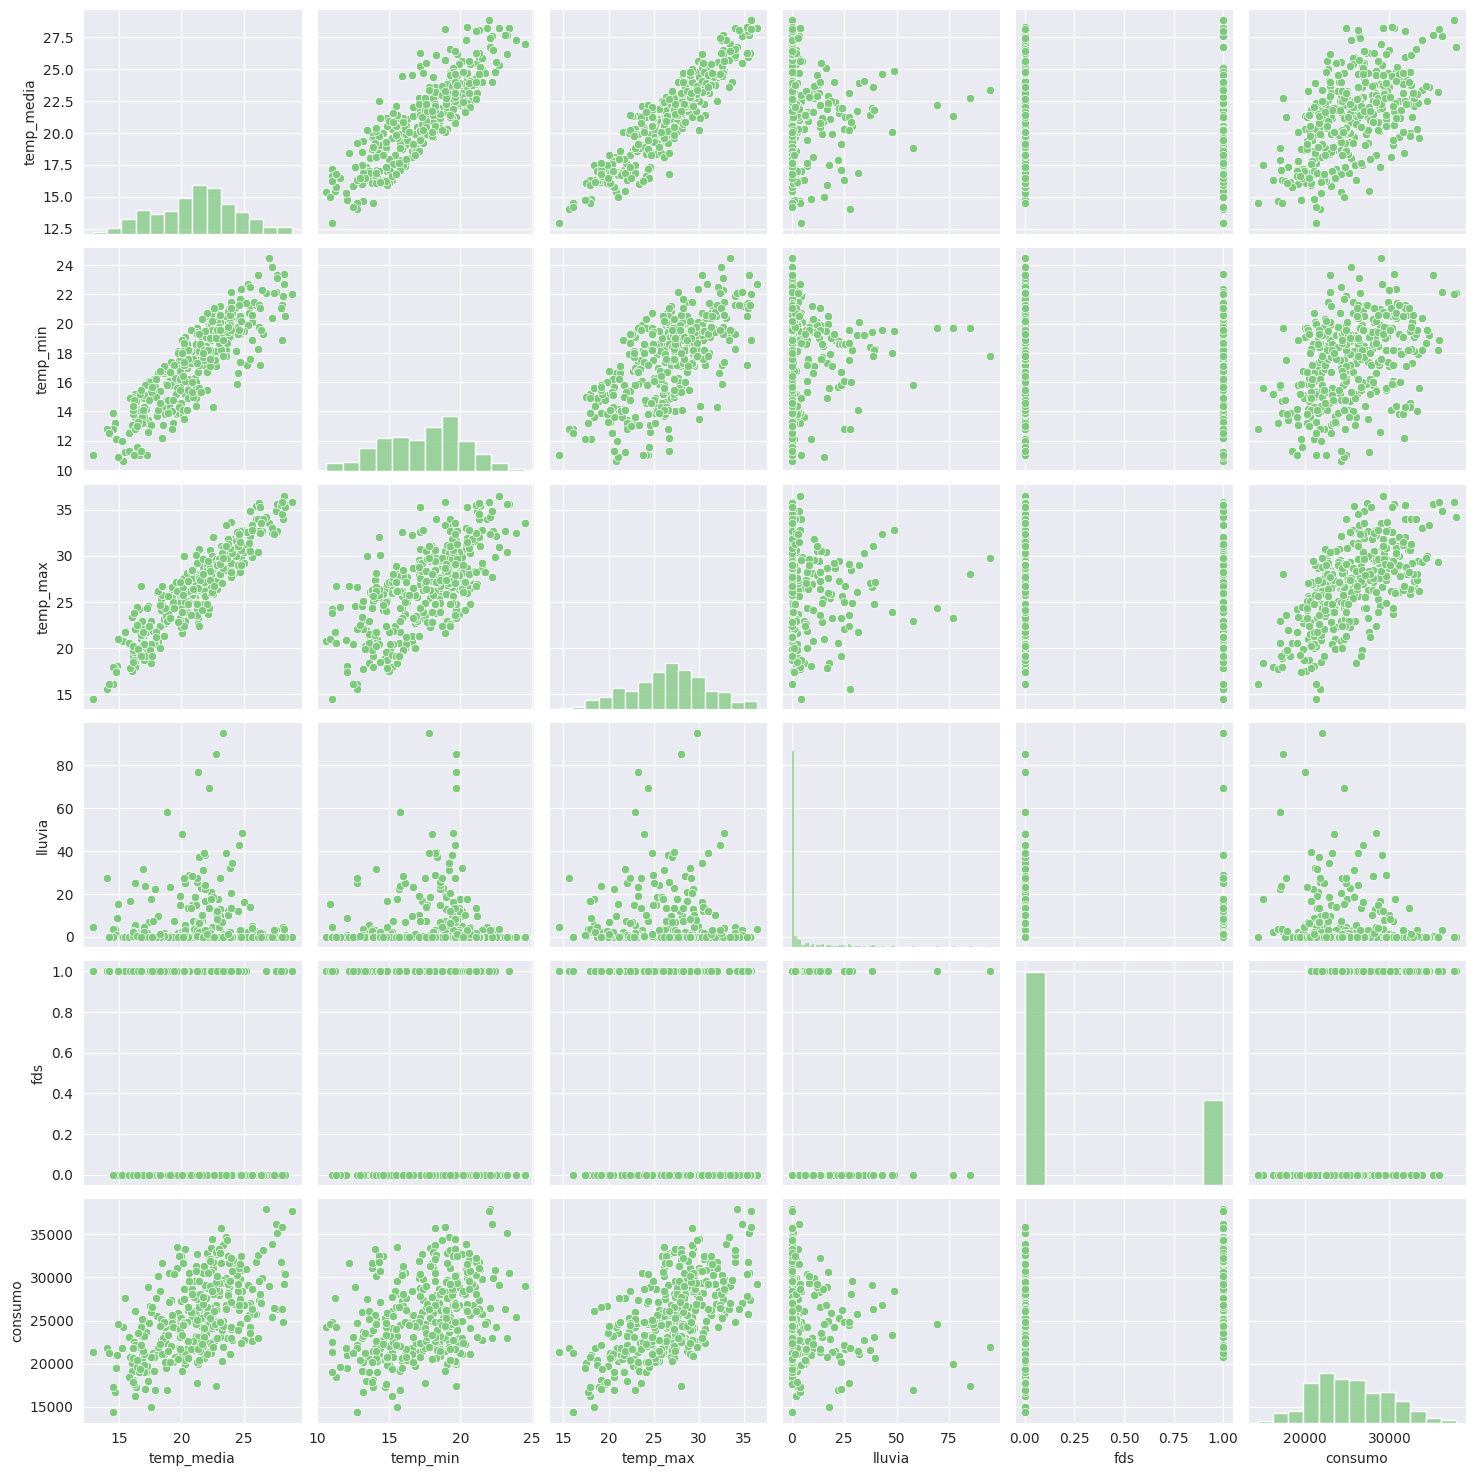

In [20]:
ax=sns.pairplot(datos)

## Graficar el pairplot fijando solo una variable en el eje y.

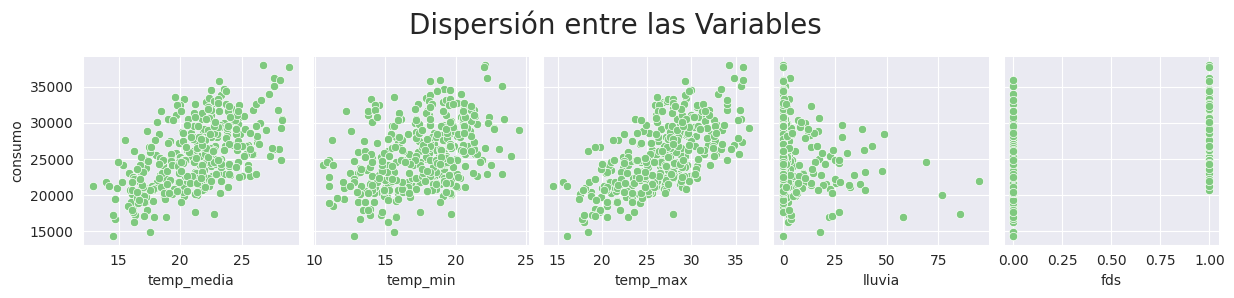

In [21]:
#nos fijamos en la varaibkle consumo
#la funcion pairplot pide dos parametros d entrada, primro la data de dodne grafcios, y leufo la varaibles de eje x y eje y
#elegimos para y la varaible conusmo y para el eje x elegimos el resto de las variables
ax=sns.pairplot(datos, y_vars= 'consumo', x_vars=['temp_media', 'temp_min', 'temp_max','lluvia','fds'], diag_kind=None )
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.15)
ax

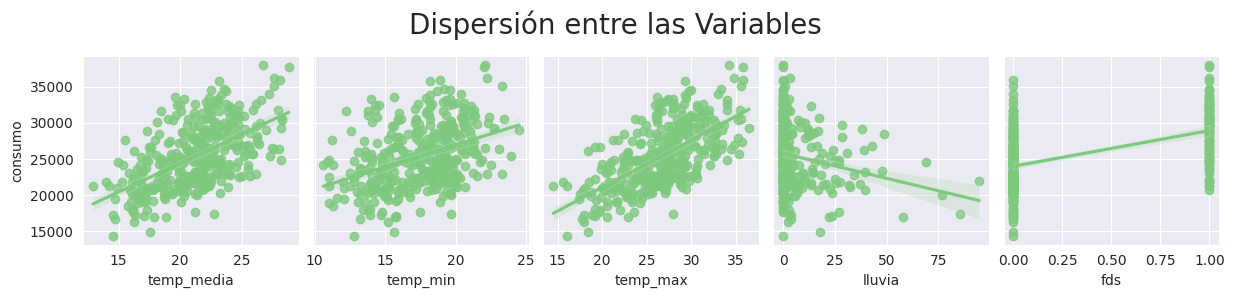

In [22]:
#agremos en el grafico pairplotuna recta de regresion, con el parametro kind='reg'
ax=sns.pairplot(datos, y_vars= 'consumo', x_vars=['temp_media', 'temp_min', 'temp_max','lluvia','fds'], diag_kind=None, kind='reg' )
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.15)
ax

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia.</p>

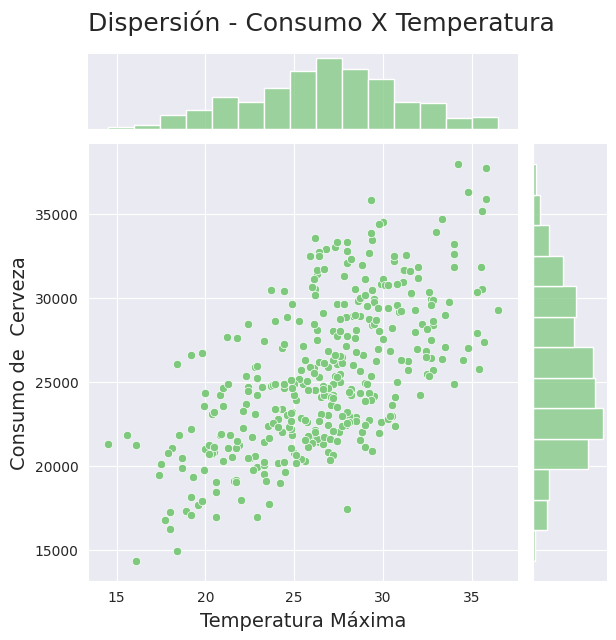

In [23]:
#creamos un grafico con la funcion joinplot, 1er prametro es eje x(la varaibelq ueremos) y el aprametro y(la varaibel qu quermeos) y por ulitmo la data.
ax=sns.jointplot(x='temp_max',y='consumo',data=datos)
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de  Cerveza', fontsize=14)
ax

## Graficar un jointplot con la recta de regresión estimada

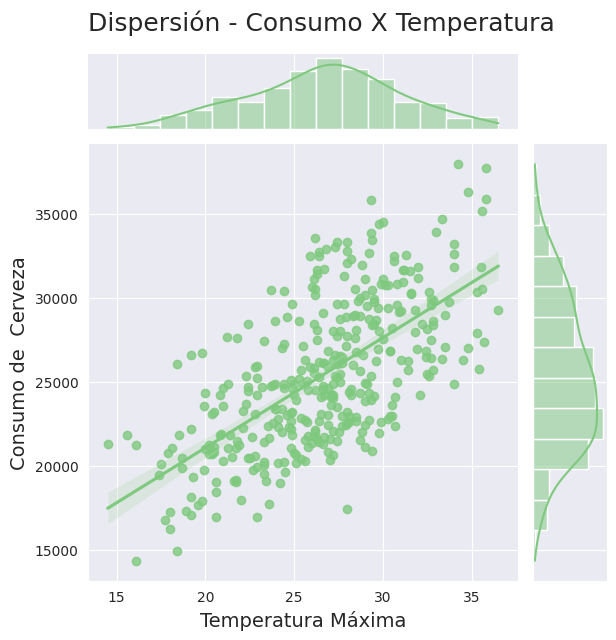

In [24]:
#con el parametro kind"reg" agremos la recta
ax=sns.jointplot(x='temp_max',y='consumo',data=datos,kind='reg')
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de  Cerveza', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Trazar la recta de regresión entre dos variables junto con la dispersión entre ellas.</p>

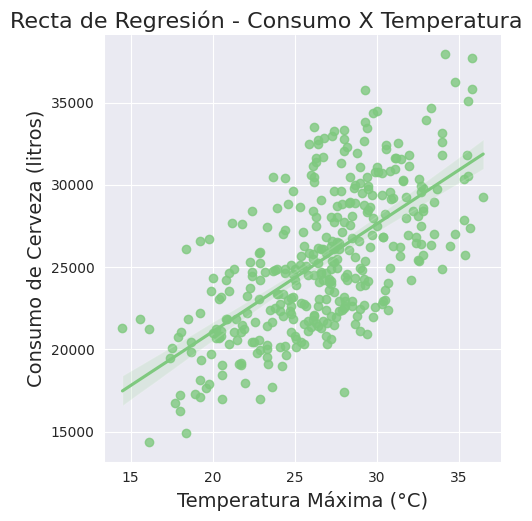

In [25]:
#hace cosas adicones a la pair plot y jointplot
#usamos la funcion lmplot. nos pdie como parametro varaible apra eje x y y y tambien ela data.
ax=sns.lmplot(x='temp_max',y='consumo',data=datos)
#escribrmos los titulos apra el eje x y y y el titulo del grafico
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax

## Graficar un lmplot con una tercera variable en el análisis (tipo I).

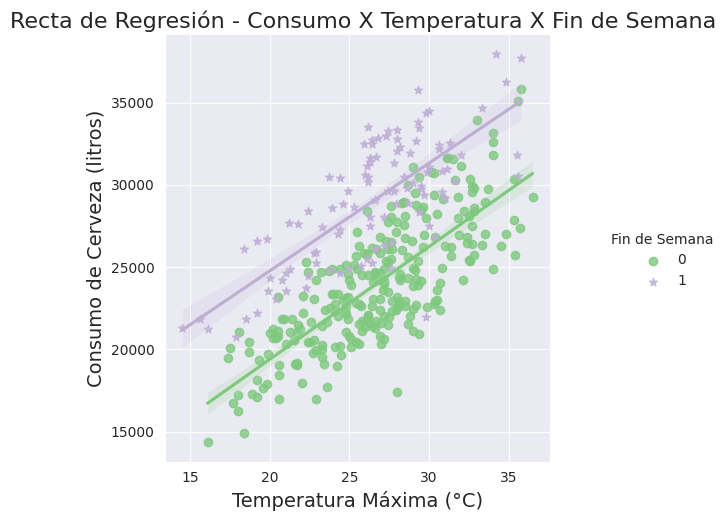

In [26]:
#para graficar un lmplot con una tercera varaible usamos el parametro hue=.
#usamos marcadores y sin leyendas agregando los parametros markers= y legend=False
ax=sns.lmplot(x='temp_max',y='consumo',data=datos,hue='fds',markers=['o','*'],legend=False)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura X Fin de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
#agregamos algrafico con lafuncion add_legend una leyenda.
ax.add_legend(title='Fin de Semana')
ax

## Graficar un lmplot con una tercera variable en el análisis (tipo II).

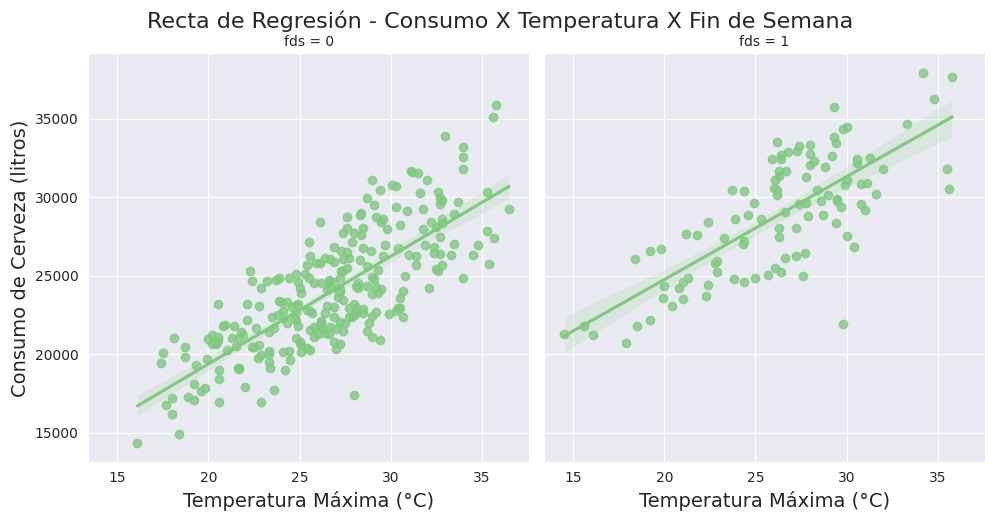

In [27]:
#hacemos el mismo grafico pero lo sepramos en dos, para lograr esto reemplazmos el parametro hue= por col=.
ax=sns.lmplot(x='temp_max',y='consumo',data=datos,col='fds')
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura X Fin de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal para el Consumo</font>
<hr style='border: 2px solid red;'>

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



## Importando el *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:

from sklearn.model_selection import train_test_split
#la funcion pide dos pramaetros primero un dataframe que con tiene la varaible dependiente y luego un data frame que contiene las varaibles explicativas.

## Creando una Series (pandas) para almacenar el Consumo de Cerveza (y).

In [29]:
#siguendo la nomencaltura usamos "y" para el dataframe para la varible dependiente.
y=datos['consumo']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [30]:
#siguiendo la nomenclatura usamos x para el dataframe para las varaible explictivas
#las varibales explicativas tiene que tern una relacion fuerte con consumo o algo debil y que no tenga relacion fuerte entre ellas
X=datos[['temp_max','lluvia','fds']]

## Creando los datasets de entrenamiento y de prueba

In [31]:
#esta funcion nos devulve 4 elelmtos en una lista.
#donde asignamos a cada elelmento de la lista su devido contenido y respentamos el orden que parcen en la lista
#x_train es el x de conjunto de entranamiento, este nos dara los valores d ela varaible explicativas asignada al conjunto de netranamiento
#x_test es el x de conjunto de prueba este nos dra los valores d ela varaible explicativas asginada al conjutno de p´rueba
#y_train  es el y del conjunto de entranamiento, el cual esta relacionada con x_train
#y_test  es el y del conjunto de entranamiento, el cual esta relacionada con  x_test
#la funcion nos pide dos parametros x y y anteriormente mencionadasy tmabine nos pide el aprametro test_size q es la cantidad que vamos separa para el conjunto de pruebas en erminos de pocentaje
#el porcentaje mas usado es el 0.3 osea el 30% y fnamente agrramos el paramtro randon_state para generar numero aleatorios, usamos el argumento de 2811 para que negere simpre los mimmas cantidad de numeros.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2811)

## Comprobando los tamaños de los archivos generados por la función *train_test_split*.

In [32]:
#vemos el tamaña del dataframe asignado.
X_train.shape

(255, 3)

In [33]:
X_test.shape

(110, 3)

In [34]:
#si sumamos las x tenemos un total de 365 dias,
X_train.shape[0]+X_test.shape[0]

365

In [35]:
X.shape[0]*0.3

109.5

In [36]:
X.shape[0]*0.7

255.49999999999997

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_01.jpg'>

In [37]:
#beta 1 es el interceptor, es donde la recta de regregrecion corta el eje "y"
#los d emos beta son las pendiente parciales, tambine llamdas coefientes de regresion
#cada x represnetra una varible explicativa
# U es el compoente de error nos dice en porcentaje q parte del los componente de "Y " no pudo ser explicada

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [38]:
from sklearn.linear_model import LinearRegression
#TAMBIEN IMPRTAMOS LA FUNCION METRIC, ES LA ENCARGADA DE ANALISAR LA CALIDAD DE ESTIMACION DEL MODELO
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [39]:
#guardamos la funcion LinearRegression() en una varaible para pder usalar mas facilmente.
modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [40]:
#ajustamos la varible modelo y colo cmos como parametros x y y que vamos entrenar.
modelo.fit(X_train,y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [41]:
#score es la fucion que calcula  el cofecinte de determinacion y nos pide como parametro x y y, que son los datos apra el entranamiento. y lo redodneamos a dos decimales.
#con el codigo R² = {} indicamos que el coeficnete de determinacion pararecera dentros de las llave
print('R²={}'.format(modelo.score(X_train,y_train).round(2)))
#el r2 asume numeros desde el cero al uno, miestras ams cerca de uno este mejor es el ajuste de nuestro modelo. miestras mas cerca de cero
#este coeficnet enos dice el 73% del consumo puede ser explicado por el modelo por la vairble sexplicativas
#tambine debemos evluar el poder de pronostico del modelo para ello debemos contruir los pronnosticos del modelo

R²=0.73


## Generando predicciones para los datos de ENTRENAMIENTO (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [42]:
##tambine debemos evluar el poder de pronostico del modelo para ello debemos contruir los pronnosticos del modelo
#usmaos la funcion predict, usmaos el modelo q ya esta estimado (modelo), y nos pide un parametros vamos usar la x_test ya hemos suamos x_train, apra ayduar a predecir el consumo
y_predicho=modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [43]:
#vamos compara los pronosticoss del consumo estimados por el modelo con los verdades valores. los valores de "y"  y para esto calcularemos otro R² en funcion de y_test y y_predicho
#en lugar de modelo escribimos metrics y e lugar de metrics escribimos r2_metrics, cambaimos X_train por y_test y  y_train por y_predicho
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

R²=0.69


# <font color='red' style='font-size: 30px;'>Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrata

In [44]:
#
entrada=X_test[0:1]
entrada

,temp_max,lluvia,fds
5,30.5,12.2,0


## Generando predicción puntual

In [45]:
#usmaos la funcion predic en nuestromodelo estimado, como solo quermo el valor dnetros de l matriz agremomos[0]  al final
modelo.predict(entrada)[0]

26094.901775262017

## Creando un simulador simple

In [46]:
#cremos preimero los nombres de la varibles
#usamos lo valoresde la la primera linea que obtuvimos anteriomente que estan en la varible entrada
temp_max=30.5
lluvia = 12.2
fds = 0
#agremoas las varibles a la varaible entrada
entrada=[[temp_max,lluvia,fds]]
#prsetamos de manera formal la prediccion. usamos la funcion predic en nuestro moedelo
print('{} litros'.format(modelo.predict(entrada)[0].round(2)))
#como el resultado de nuestro simulador coincide con lo obtenido anteriormente en el generado de predicion

26094.9 litros


In [47]:
temp_max=40
lluvia = 0
fds = 1
entrada=[[temp_max,lluvia,fds]]

print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_02.jpg'>

## Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Consumo de cerveza) con todas las variables explicativas excluidas del modelo. Dicho de otra forma, el <b> intercepto </b> representa el efecto medio en $ Y $ (consumo de cerveza) cuando $ X_2 $ (temperatura máxima), $ X_3 $ (lluvia) y $ X_4 $ (fin de semana ) son iguales a cero.</p>

In [48]:
#para ve su valor usamos la funcion intercept en nuestro modelo(varible modelo)
modelo.intercept_

5951.976339312445

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2 $, $\beta_3 $ y $\beta_4 $ son conocidos como <b> coeficientes de regresión parcial </b> o <b> coeficientes angulares parciales </b> . Considerando el número de variables explicativas en nuestro modelo, su significado sería el siguiente: $ \beta_2 $ mide la variación en el valor medio de $ Y $ (Consumo de cerveza) por variación unitaria en $ X_2 $ (Temperatura máxima), manteniéndose constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de semana). En otras palabras, $ \beta_2 $ nos da el efecto "directo" o "neto" de una unidad de variación en $ X_2 $ sobre el valor medio de $ Y $, excluyendo los efectos que pueden tener $ X_3 $ y $ X_4 $ en el promedio de $ Y $. Del mismo modo podemos interpretar los demás coeficientes de regresión.</p>

In [49]:
#los beta miden el efecto parcial de cada varible explicativa
#para obtener los cofecineste de regresion usamos la funcion coef_ sobre la varaible que contiene nuestro modelo
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

## Confirmando el orden de las variables explicativas en el DataFrame

In [50]:
X.columns

Index(['temp_max', 'lluvia', 'fds'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [51]:
#creamos una lista con los nombre de las varaible explicativas coreespondeite a cada beta para q pongamos el data frame
index=['Intercepto','Temperatura Máxima','Lluvia (mm)', 'Fin de Semana']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [52]:
#cremos un array(matriz) con los valores del beta 1 o interceptor y uniendolos a los de los demoas beta para lograr esto suamos la funcion app de nympy
#esta fucion tmabien nos pdie el parametro index, que son los nombre de las varaibles que creamos q su nombre es index
#y tambine podemos suar el aprametro columns para dar el titulo de la columna de los valores
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index, columns=['Parámetros'])

,Parámetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Lluvia (mm),-60.782435
Fin de Semana,5401.083339


## Interpretación de los coeficientes estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($ X_2 = X_3 = X_4 = 0 $) el efecto medio en el Consumo de Cerveza sería <b> 5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C) </b> → Manteniendo constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de Semana), el aumento de 1°C en la Temperatura Máxima genera una variación media en el Consumo de Cerveza de <b> 684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Lluvia (mm) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura Máxima) y $ X_4 $ (Fin de Semana), la adición de 1 mm de Lluvia genera una variación media en el Consumo de Cerveza de <b > -60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Fin de semana (Sí / No) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura máxima) y $ X_3 $ (Lluvia), el hecho de que el día se clasifique como Fin de semana genera una variación media en el consumo de cerveza de <b> 5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análisis gráfico de las predicciones del modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [53]:
#creamos estiamcion del consumo en base a los datos del entrenamiento y esta predicicones lallamremos y_predicho_train, y usamos al funcion predict
y_predicho_train=modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Predicción X Real'}, xlabel='Consumo de Cerveza (litros) - Predicción', ylabel='Consumo de Cerveza (litros) - Real'>

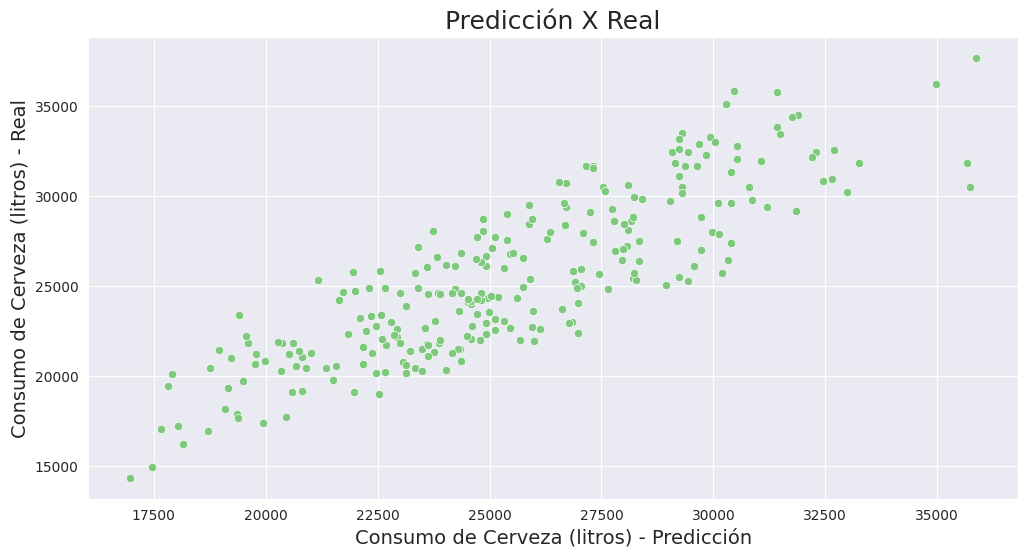

In [54]:
#usamo la funcion scarter plot, nos pide como aprametro x y y.
ax=sns.scatterplot(x=y_predicho_train,y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Predicción', fontsize=14)
ax.set_ylabel('Consumo de Cerveza (litros) - Real', fontsize=14)
ax

## Obteniendo los residuos

In [55]:
#para los valores mas alto vemos valroes mas dipersos que apra lso valores mas abjode consumo
#el ajsute del modelo es mejor apra valores mas bajode consumo
#esto no buneo ya q el ajsute del modelo no tendria tener mucha dipersion con respecto a larecta de regresion.
#para entender loq esta pasando debemos ver los resiudos delmodelo
#los residuos q vamos calcular son los elementos d eu
#
residuo=y_train-y_predicho_train
residuo
#no devuelve una series panda

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersión entre valor estimado y residuos

Método informal para verificar la hipótesis de varianza constante de los residuos (homocedasticidad)

<Axes: title={'center': 'Residuos X Predicción'}, xlabel='Consumo de Cerveza (litros) - Predicción', ylabel='Residuos'>

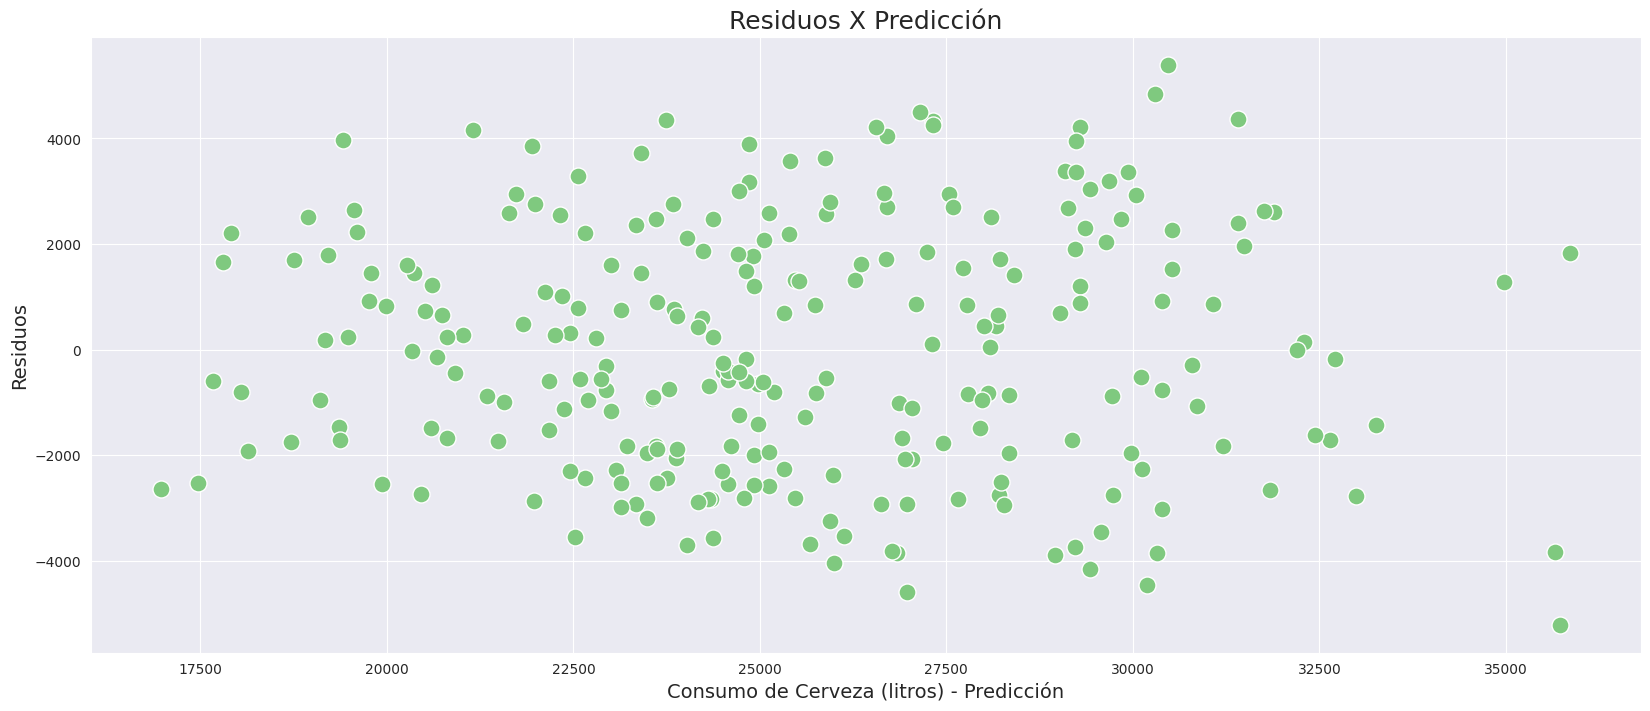

In [56]:
ax=sns.scatterplot(x=y_predicho_train,y=residuo,s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residuos X Predicción', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Predicción', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
ax

## Usando los residuos al cuadrado

<img width='1500px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/var_u.jpg'>
Fuente: Econometria Básica - 5ª edición - Gujarati y Porter

<Axes: title={'center': 'Residuos X Predicción'}, xlabel='Consumo de Cerveza (litros) - Predicción', ylabel='Residuos²'>

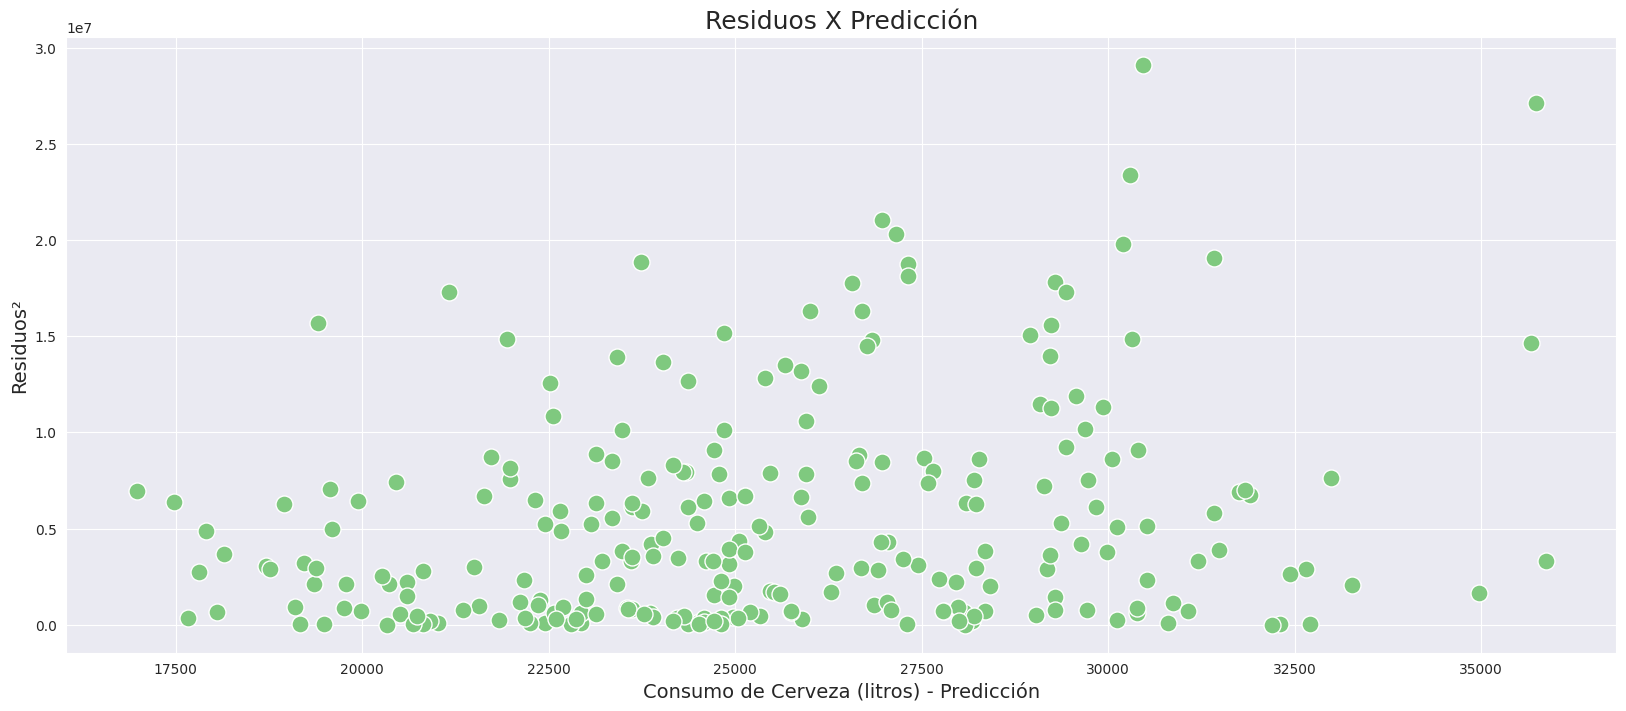

In [57]:
#graficamos los residuos al cuadrado, como no hya varias constante y para ver mas claramente si hya una variacion en lso residuos y por eso lo multiplciamos al cudrado
#lo idal es qsea al prierm grafcico
ax=sns.scatterplot(x=y_predicho_train,y=residuo**2,s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residuos X Predicción', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Predicción', fontsize=14)
ax.set_ylabel('Residuos²', fontsize=14)
ax

## Graficando la distribuición de frecuencias de los residuos

<Axes: title={'center': 'Distribuición de Frecuencias de los Residuos'}, xlabel='Litros', ylabel='Density'>

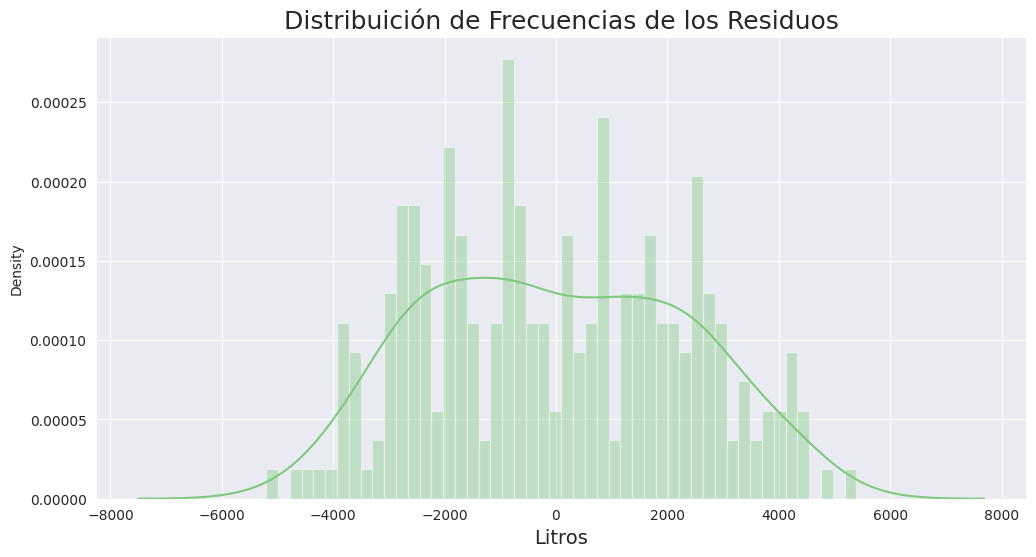

In [58]:
#vamos aver si los residuos siguen una distribucion normal atraves deun histograma
ax=sns.distplot(residuo,bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

In [59]:
#Vemos que la situación no es simétrica y tiene muchos picos, así que no podemos decir que los residuos son normalmente distribuidos.
# Estas son las principales hipótesis que deben cumplirse para que los resultados de nuestro modelo ajustado y sus predicciones sean válidos. El primero es homocedasticidad, varianza constante de residuos. Y el segundo es distribución normal de los residuos.

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>


<hr style='border: 2px solid red;'>

## Estimación de un nuevo modelo con la sustitución de la variable explicativa Temperatura máxima por Temperatura media.

In [60]:
#creamos un nuevo dataframe con un nuevo conjutnos de varaiables explicativas
X2=datos[['temp_media','lluvia','fds']]

## Creando los datasets de entrenamiento y de prueba

In [61]:
#cambaimso x por x2 y y por y2. los valores  de y2 son los mismo de antes solo estamos cmabiando sus nombres. los q cambarion solo valores basados en  la matriz x
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.3,random_state=2811)

## Instanciar la clase *LinearRegression()*

In [62]:
modelo_2=LinearRegression()

## Usando el método *fit()* del objeto "modelo_2" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y2_train e X2_train)

In [63]:
modelo_2.fit(X2_train,y2_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del nuevo modelo estimado y comparando con el resultado del modelo anterior

In [64]:
print('Modelo con Temp. Media')
print('R²={}'.format(modelo_2.score(X2_train,y2_train).round(2)))

Modelo con Temp. Media
R²=0.66


In [65]:
print('Modelo con Temp. Máxima')
print('R²={}'.format(modelo.score(X_train,y_train).round(2)))

Modelo con Temp. Máxima
R²=0.73


## Generando predicciones para los datos de PRUEBA (X_test e X2_test) con el método *predict()* de los objetos "modelo" e "modelo_2"

In [66]:
y_predicho_2=modelo_2.predict(X2_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones de los dos modelos

In [67]:
print('Modelo con Temp. Media')
print('R²={}'.format(metrics.r2_score(y2_test,y_predicho_2).round(2)))

Modelo con Temp. Media
R²=0.66


In [68]:
print('Modelo con Temp. Máxima')
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

Modelo con Temp. Máxima
R²=0.69


# <font color='red' style='font-size: 30px;'>Otras Métricas de Regresión</font>
<hr style='border: 2px solid red;'>

## Métricas da regresión
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

### Error Cuadrático Medio

Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz del Error Cuadrático Medio

Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obteniendo métricas para el modelo con Temperatura Media

In [69]:
#usmaos la funcion metric y la funcion mean_squared_error para calcualra el error
EQM_2=metrics.mean_squared_error(y2_test,y_predicho_2).round(2)
#usamos la funcion derazi cudrada de numpy.
REQM_2=np.sqrt(EQM_2).round(2)

R2_2=metrics.r2_score(y2_test,y_predicho_2).round(2)
#colcoamos todo en un data frame, entre corchete la lista de los valores, luego los nombre d ela lista de los valroes respectivos y por  ultimo el nombre de la columna.
pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM_2','REQM_2','R2_2'],columns=['Métricas'])

,Métricas
EQM_2,6060775.46
REQM_2,2461.86
R2_2,0.66


## Obteniendo métricas para el modelo con Temperatura Máxima

In [70]:
#hacemos ahora con tempperatura maxima y no media,.
EQM=metrics.mean_squared_error(y_test,y_predicho).round(2)
REQM=np.sqrt(EQM).round(2)
R2=metrics.r2_score(y_test,y_predicho).round(2)

pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R2'],columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R2,0.69


In [ ]:
#poemods notar que elmodelo de tamperatu maxima el 1er modeloq creamos producen menos errores, tiene un meno coeficiente en emq y reqm

# <font color='red' style='font-size: 30px;'>Guardando y cargando el modelo estimado</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [71]:
X_test[0:1]

,temp_max,lluvia,fds
5,30.5,12.2,0


In [72]:
entrada = X_test[0:1]

## Generando predicción puntual

In [73]:
modelo.predict(entrada)[0]

26094.901775262017

## Creando un simulador simple

In [74]:
temp_max=30.5
lluvia=12.2
fds=0
entrada=[[temp_max, lluvia, fds]]

print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

26094.9 litros


## Guardando el modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El módulo <b> pickle </b> implementa protocolos binarios para serializar y deserializar la estructura de un objeto Python.</p>

In [75]:
#con esta bibilioteca guardamos el modelo
import pickle

In [76]:
#guardamos en la varibale output y usamos la funcion open, este archivo contendra el modelo estimado
output=open('modelo_consumo_cerveza','wb')
#dump es la funcion que nos permite guradar el modelo creado en el archivo creado output=open('modelo_consumo_cerveza','wb')
pickle.dump(modelo,output)
#y por ultimo cerramos el archivo
output.close()

### En un nuevo notebook/proyeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveza','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
lluvia = 12.2
fds = 0
entrada = [[temp_max, lluvia, fds]]
print('{} litros'.format(lm_new.predict(entrada)[0].round(2)))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```